In [6]:
from sklearn import datasets
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
boston = datasets.load_boston()

print(boston.data.shape)
print(dir(boston))
# CRIM: 人口 1 人当たりの犯罪発生数
# 25,000 平方フィート以上の住居区画の占める割合
# INDUS: 小売業以外の商業が占める面積の割合
# CHAS: チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)
# NOX: NOX の濃度
# RM: 住居の平均部屋数
# AGE: 1940 年より前に建てられた物件の割合
# DIS: 5 つのボストン市の雇用施設からの距離 
# RAD: 環状高速道路へのアクセスしやすさ
# TAX: $10,000 ドルあたりの不動産税率の総計
# PTRATIO: 町毎の児童と教師の比率
# B: 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2
# LSTAT: 給与の低い職業に従事する人口の割合 (%)

(506, 13)
['DESCR', 'data', 'feature_names', 'target']


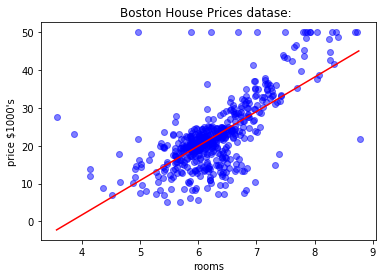

In [11]:
#  RMを取り出し、 (1, -1) もしくは(-1, 1) を指定することで2次元の横ベクトル及び縦ベクトルを作成 (Scikit-leranのfit()に渡せる形へ変換)
train_X = boston.data[:, 5].reshape(-1, 1)
train_y = boston.target

model = linear_model.LinearRegression()
model = linear_model.LinearRegression()
model.fit(train_X, train_y)

rooms_train = DataFrame(boston_df["RM"])

rooms_test = DataFrame(np.arange(rooms_train.min(), rooms_train.max(), 0.1))
prices_test = model.predict(rooms_test)

# グラフ
plt.scatter(train_X, train_y, c='b', alpha=0.5)
plt.plot(rooms_test, prices_test, c='r')
plt.title("Boston House Prices datase: ")
plt.xlabel("rooms")
plt.ylabel("price $1000's")
plt.show()

In [12]:
# データの分割による性能評価と回帰の評価

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# データセットの読み込み
boston = datasets.load_boston()

#  RMを取り出し、 (1, -1) もしくは(-1, 1) を指定することで2次元の横ベクトル及び縦ベクトルを作成 (scikit-leranのfit()に渡せる形へ変換)
x_train = boston.data[:, 5].reshape(-1, 1)
y_train = boston.target

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, 
test_size = 0.3, random_state=0)

# 学習用データでパラメータ推定
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 学習用、検証用データに関してR^2を出力 (回帰モデルの場合score()を使うことで決定係数が得られます。)
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 42.158, Test : 47.033
R^2 Train : 0.503, Test : 0.435
